Importez vos données et effectuez la phase d’exploration des données de base

In [3]:
#importation de la données
import pandas as pd

data=pd.read_csv('/content/Credit_card_dataset.csv')
data.head()


,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [4]:
#information sur la données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [5]:
#description de la données
data.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [6]:
print(data.columns)

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')


Effectuer les étapes nécessaires à la préparation des données ( Gestion des valeurs corrompues et manquantes, encodage des données, gestion des valeurs aberrantes... )

In [7]:
#vérification de valeur manquante
data.isnull().sum()
#supression de la valeur manquante
data.dropna(inplace=True)

In [8]:
#encodage
data['BALANCE_FREQUENCY'] = data['BALANCE_FREQUENCY'].apply(lambda x: 1 if x >= 0.5 else 0)

In [9]:
#supprimer CUST_ID
data.drop('CUST_ID', axis=1, inplace=True)


In [17]:

# Détection des valeurs aberrantes avec la méthode IQR
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indexes = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = outlier_indexes.tolist()
    return outliers

outliers_detected = detect_outliers_iqr(data)

# Affichage des colonnes contenant des outliers
for col, indexes in outliers_detected.items():
    print(f"Colonne: {col}, Nombre d'outliers: {len(indexes)}")


Colonne: BALANCE_FREQUENCY, Nombre d'outliers: 913
Colonne: PURCHASES, Nombre d'outliers: 808
Colonne: PAYMENTS, Nombre d'outliers: 808
Colonne: CREDIT_LIMIT, Nombre d'outliers: 248
Colonne: CASH_ADVANCE, Nombre d'outliers: 1030
Colonne: PURCHASES_clipped, Nombre d'outliers: 0
Colonne: CREDIT_LIMIT_clipped, Nombre d'outliers: 0


Effectuez un clustering hiérarchique pour identifier les regroupements inhérents à vos données. Ensuite, tracez les clusters. (n’utilisez que 2 fonctionnalités. Par exemple, essayez de regrouper la base de clients en fonction de 'ACHATS' et 'Limite de crédit')

In [18]:
from sklearn.preprocessing import StandardScaler

X = data[['PURCHASES', 'CREDIT_LIMIT']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [19]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Agglomerative Clustering avec 3 clusters
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = model.fit_predict(X_scaled)

# Ajouter les labels (clusters)
data['Cluster'] = labels



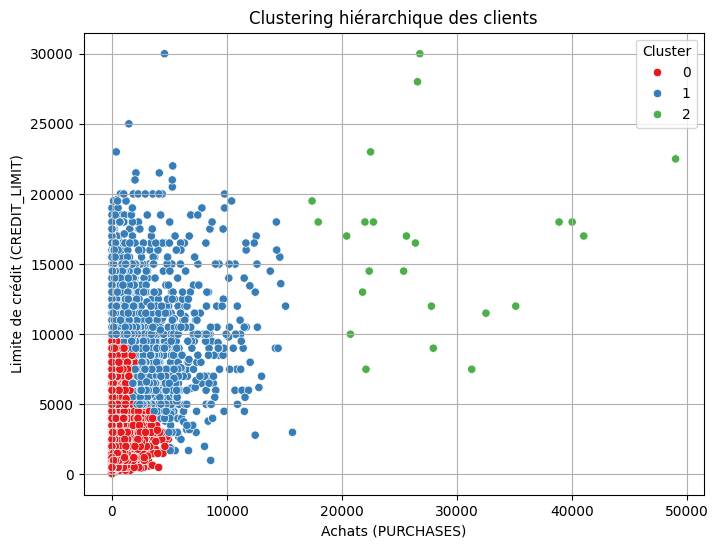

In [26]:
# On utilise les valeurs originales (non-scalées) pour que ce soit plus parlant
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PURCHASES'], y=data['CREDIT_LIMIT'], hue=data['Cluster'], palette='Set1')
plt.title("Clustering hiérarchique des clients")
plt.xlabel("Achats (PURCHASES)")
plt.ylabel("Limite de crédit (CREDIT_LIMIT)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Effectuez un clustering partitionnel à l’aide de l’algorithme K-means. Ensuite, tracez les clusters

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# K-Means avec 3 clusters (modifiable)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Ajouter les clusters au DataFrame
data['Cluster_KMeans'] = labels


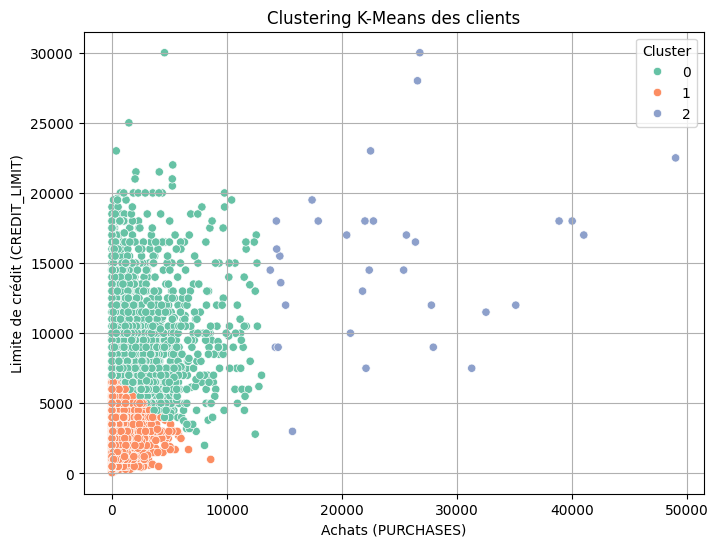

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PURCHASES'], y=data['CREDIT_LIMIT'], hue=data['Cluster_KMeans'], palette='Set2')
plt.title("Clustering K-Means des clients")
plt.xlabel("Achats (PURCHASES)")
plt.ylabel("Limite de crédit (CREDIT_LIMIT)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


INTERPRETATION DE NOTRE GRAPHIQUE
après le Kmeans nous avont obtenue 3 clusters

le cluster 0 : réprésentes les utilisateur avec un faible pouvoir d'achat mais qui on une limite de crédit  moyen

le cluster 1 : réprésentes les utilisateurs avec des faible pouvoir d'achat mais qui on un faible crédit

le cluster 2 : répresentes les utilisateur qui ont un grand  pouvoir d'achat mais avec des limite  crédit variables

donc nous pouvons dire que la ségmentation est possible pas du pouvoir d'achat mais du crédit limite
nous pouvons donc scinder nos clients en trois groupes:

1er : clients a faible crédit limit

2eme : clients a crédit limit moyen

3eme : clients a crédit limit variable

pour un objectif marketing plus profond il faut se concentrer sur les a crédit limit moyen car il s'on plus nombreux et constant , proposer plus de produit dans leur fouchette d'achat  pour les attirer

Trouvez la meilleure valeur k et tracez à nouveau les clusters.


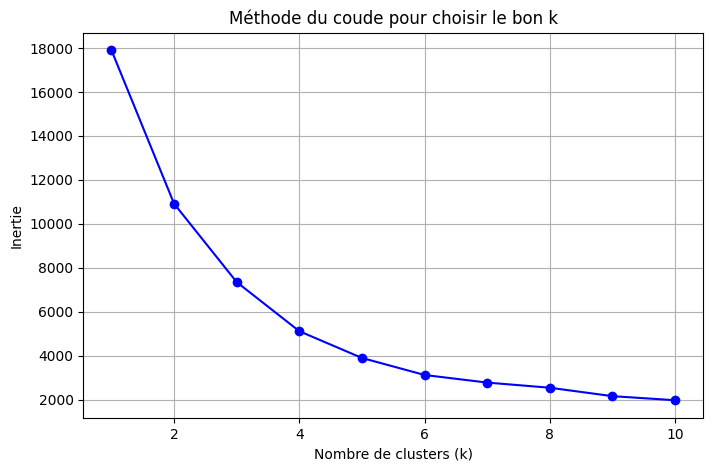

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Inertie : somme des distances intra-cluster

# Tracer la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour choisir le bon k')
plt.grid(True)
plt.show()
